<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/ghazal/kaiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

[        -inf -62.95836314 -56.97971321 ... -53.52798599 -56.97971321
 -62.95836314]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

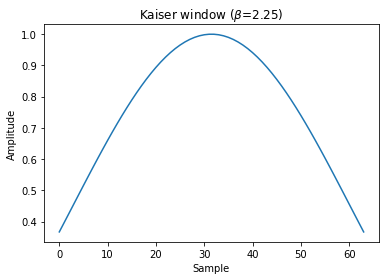

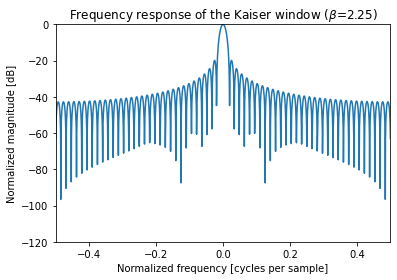

In [ ]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
print(response)
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

[        -inf -78.47723841 -62.22483172 ... -50.49208427 -62.22483172
 -78.47723841]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

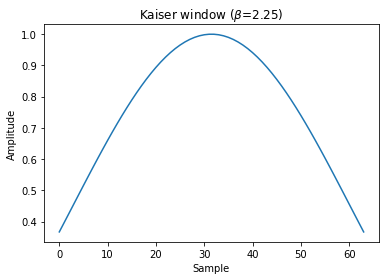

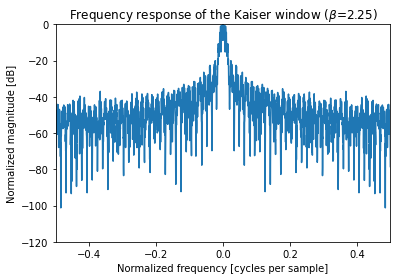

In [ ]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_k = ffreq*A
response0 = 20 * np.log10(np.abs(fftshift(s_k / abs(s_k).max())))
print(response0)
plt.plot(freq, response0)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

[-74.14704186 -35.47956511 -33.94194297 ... -37.97832203 -33.94194297
 -35.47956511]


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

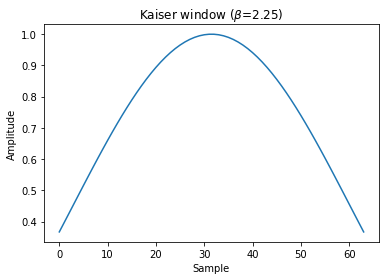

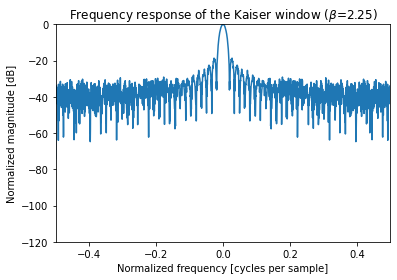

In [3]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
beta=2.25
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_f = ffreq - beta*(ffreq- A*(ffreq / abs(ffreq)))
response1 = 20 * np.log10(np.abs(fftshift(s_f / abs(s_f).max())))
print(response1)
plt.plot(freq, response1)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

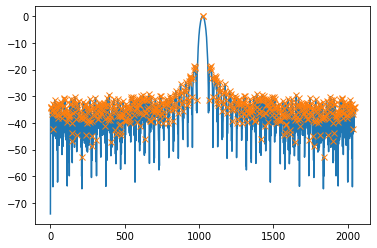

In [4]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(response1)

plt.plot(response1)
plt.plot(peaks, response1[peaks], "x")
plt.show()

In [5]:
np.sort(response1[find_peaks(response1)[0]])

array([-52.81587498, -52.81587498, -48.72197196, -48.72197196,
       -47.32519436, -47.32519436, -46.97572479, -46.97572479,
       -46.24459203, -46.24459203, -46.13313477, -46.13313477,
       -45.10060869, -45.10060869, -44.50486006, -44.50486006,
       -44.47060736, -44.47060736, -44.37408084, -44.37408084,
       -43.99803253, -43.99803253, -43.9206608 , -43.9206608 ,
       -43.24340319, -43.24340319, -42.70373336, -42.70373336,
       -42.304888  , -42.304888  , -41.14110132, -41.14110132,
       -41.12726558, -41.12726558, -40.96111692, -40.96111692,
       -40.47337482, -40.47337482, -40.19162224, -40.19162224,
       -40.17401051, -40.17401051, -40.08726861, -40.08726861,
       -39.9482217 , -39.9482217 , -39.9477223 , -39.9477223 ,
       -39.80908015, -39.80908015, -39.64679515, -39.64679515,
       -39.59601736, -39.59601736, -39.5248218 , -39.5248218 ,
       -39.4201456 , -39.4201456 , -39.39317851, -39.39317851,
       -39.35852378, -39.35852378, -39.33808525, -39.33

In [ ]:
akf=np.abs(response1 + noise)
m = np.max(akf)
akf=akf/m
AKF=akf
mm=np.max(AKF)
maxi=AKF
mm1=np.max(maxi)
PSLakf=20*np.log10(np.abs(mm1/m))
print(PSLakf)

nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
akf=np.abs(response0 , noise)
m = np.max(akf)
akf=akf/m
AKF=akf
mm=np.max(AKF)
maxi=AKF
mm1=np.max(maxi)
PSLakf=20*np.log10(np.abs(mm1/m))
print(PSLakf)

nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
